In [1]:
import os
import os.path as op
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

# 9 classifiers

### Load data

In [ ]:
root = Path('../data/bids/derivatives/decoding/')
df = pd.DataFrame()
for file in root.rglob("*/*wavelet_??_*"):
    cond = re.findall('wavelet_(\d{1,2})', file.name)[0]
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    data_dict = {
                 'cond': [cond]*917,
                 'sub': [sub]*917,
                 'accuracies': d,
                }
    sub_df = pd.DataFrame.from_dict(data_dict)
    df = pd.concat([df, sub_df], ignore_index = False)
df

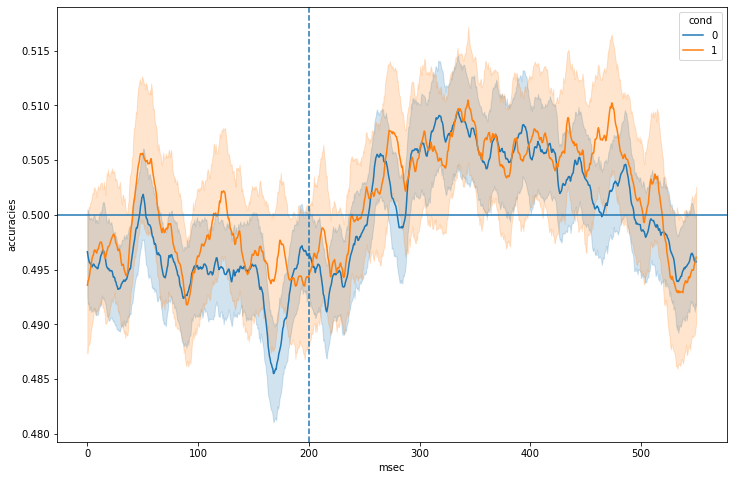

In [25]:
# Change window number to msec
df_sns = df.reset_index()
df_sns = df_sns.replace({'11': 1,
                 '22': 1,
                 '33': 1,
                 '12': 0,
                 '13': 0,
                 '21': 0,
                 '23': 0,
                 '31': 0,
                 '32': 0,
                })
df_sns['msec'] = df_sns['index']*0.6

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.lineplot(data = df_sns, x = "msec", y = "accuracies", hue = "cond", ax = ax)
graph.axhline(0.5)
graph.axvline(200, linestyle = 'dashed')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})
plt.show()

# Save figure
fig = ax.get_figure()
fig.savefig('../figs/decode_from_stft.png', dpi = 600)

# 1 Classifier

Clearly not the direction to go in

### Load data

In [4]:
root = Path('../data/bids/derivatives/decoding/')
df = {}
for file in root.rglob("*/*wavelet_target*"):
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    df[sub] = d
df = pd.DataFrame.from_dict(df)

In [5]:
df_sns = df.copy()
subs = list(df_sns.columns)
subs = ['sub-' + str(s) for s in subs]
df_sns.columns = subs
df_sns = df_sns.reset_index()
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()
df_sns

,index,sub,accuracy
0,0,7,0.494037
1,1,7,0.493286
2,2,7,0.493398
3,3,7,0.494458
4,4,7,0.495473
...,...,...,...
23837,912,29,0.508244
23838,913,29,0.506930
23839,914,29,0.506501
23840,915,29,0.506320


In [6]:
graph = sns.lineplot(data = df_sns, x = "index", y = "accuracies")
graph.axhline(0.333)
plt.show()

ValueError: Could not interpret value `accuracies` for parameter `y`

## Decode tone identity for target and non-target

In [ ]:
root = Path('../data/bids/derivatives/decoding/')
df = pd.DataFrame()
for file in root.rglob("*/*tone*"):
    if 'nontarget' in file.name:
        cond = 'nt'
    elif 'target' in file.name:
        cond = 't'
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    data_dict = {
                 'cond': [cond]*917,
                 'sub': [sub]*917,
                 'accuracies': d,
                }
    sub_df = pd.DataFrame.from_dict(data_dict)
    df = pd.concat([df, sub_df], ignore_index = False)
df

In [ ]:
df_sns = df.reset_index()
graph = sns.lineplot(data = df_sns, x = "index", y = "accuracies", hue = "cond")
graph.axhline(0.333)
plt.show()